# Tensegrity structures

### Loading libraries and files

In [65]:
#importing libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
import importlib

#importing .py files and reloading
import CableTensegrityStruct as CTS
importlib.reload(CTS)
import TensegrityStruct as TS
importlib.reload(TS)
import optimization as opt
importlib.reload(opt)
import plotting
importlib.reload(plotting)
import FreeStandingStruct as FSS
importlib.reload(FSS)

#plt.style.use('fivethirtyeight')
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')
#plt.style.use('ggplot')
from matplotlib.gridspec import GridSpec
plt.rcParams['figure.dpi'] = 300

### Test example with only cables, fixed nodes

In [66]:
#parameters for structure with only cables
num_of_fixed_nodes = 4

nodes = np.array([[ 5,  5,    0],
                  [-5,  5,    0],
                  [-5, -5,    0],
                  [ 5, -5,    0],
                  [-5,  8,    0],
                  [ 3, -4,    3],
                  [ 1,  3,   -2],
                  [ 3, -3,    0.]])

cables = np.array([[0, 4, 3],
                   [1, 5, 3],
                   [2, 6, 3],
                   [3, 7, 3],
                   [4, 5, 3],
                   [4, 7, 3],
                   [5, 6, 3],
                   [6, 7, 3]])

masses = np.array([[4, 1/6],
                   [5, 1/6],
                   [6, 1/6],
                   [7, 1/6]])

k = 3

#making structure
struct1 = CTS.CableTensegrityStruct(num_of_fixed_nodes,nodes, masses,cables, k)

BFGS used 1 iterations


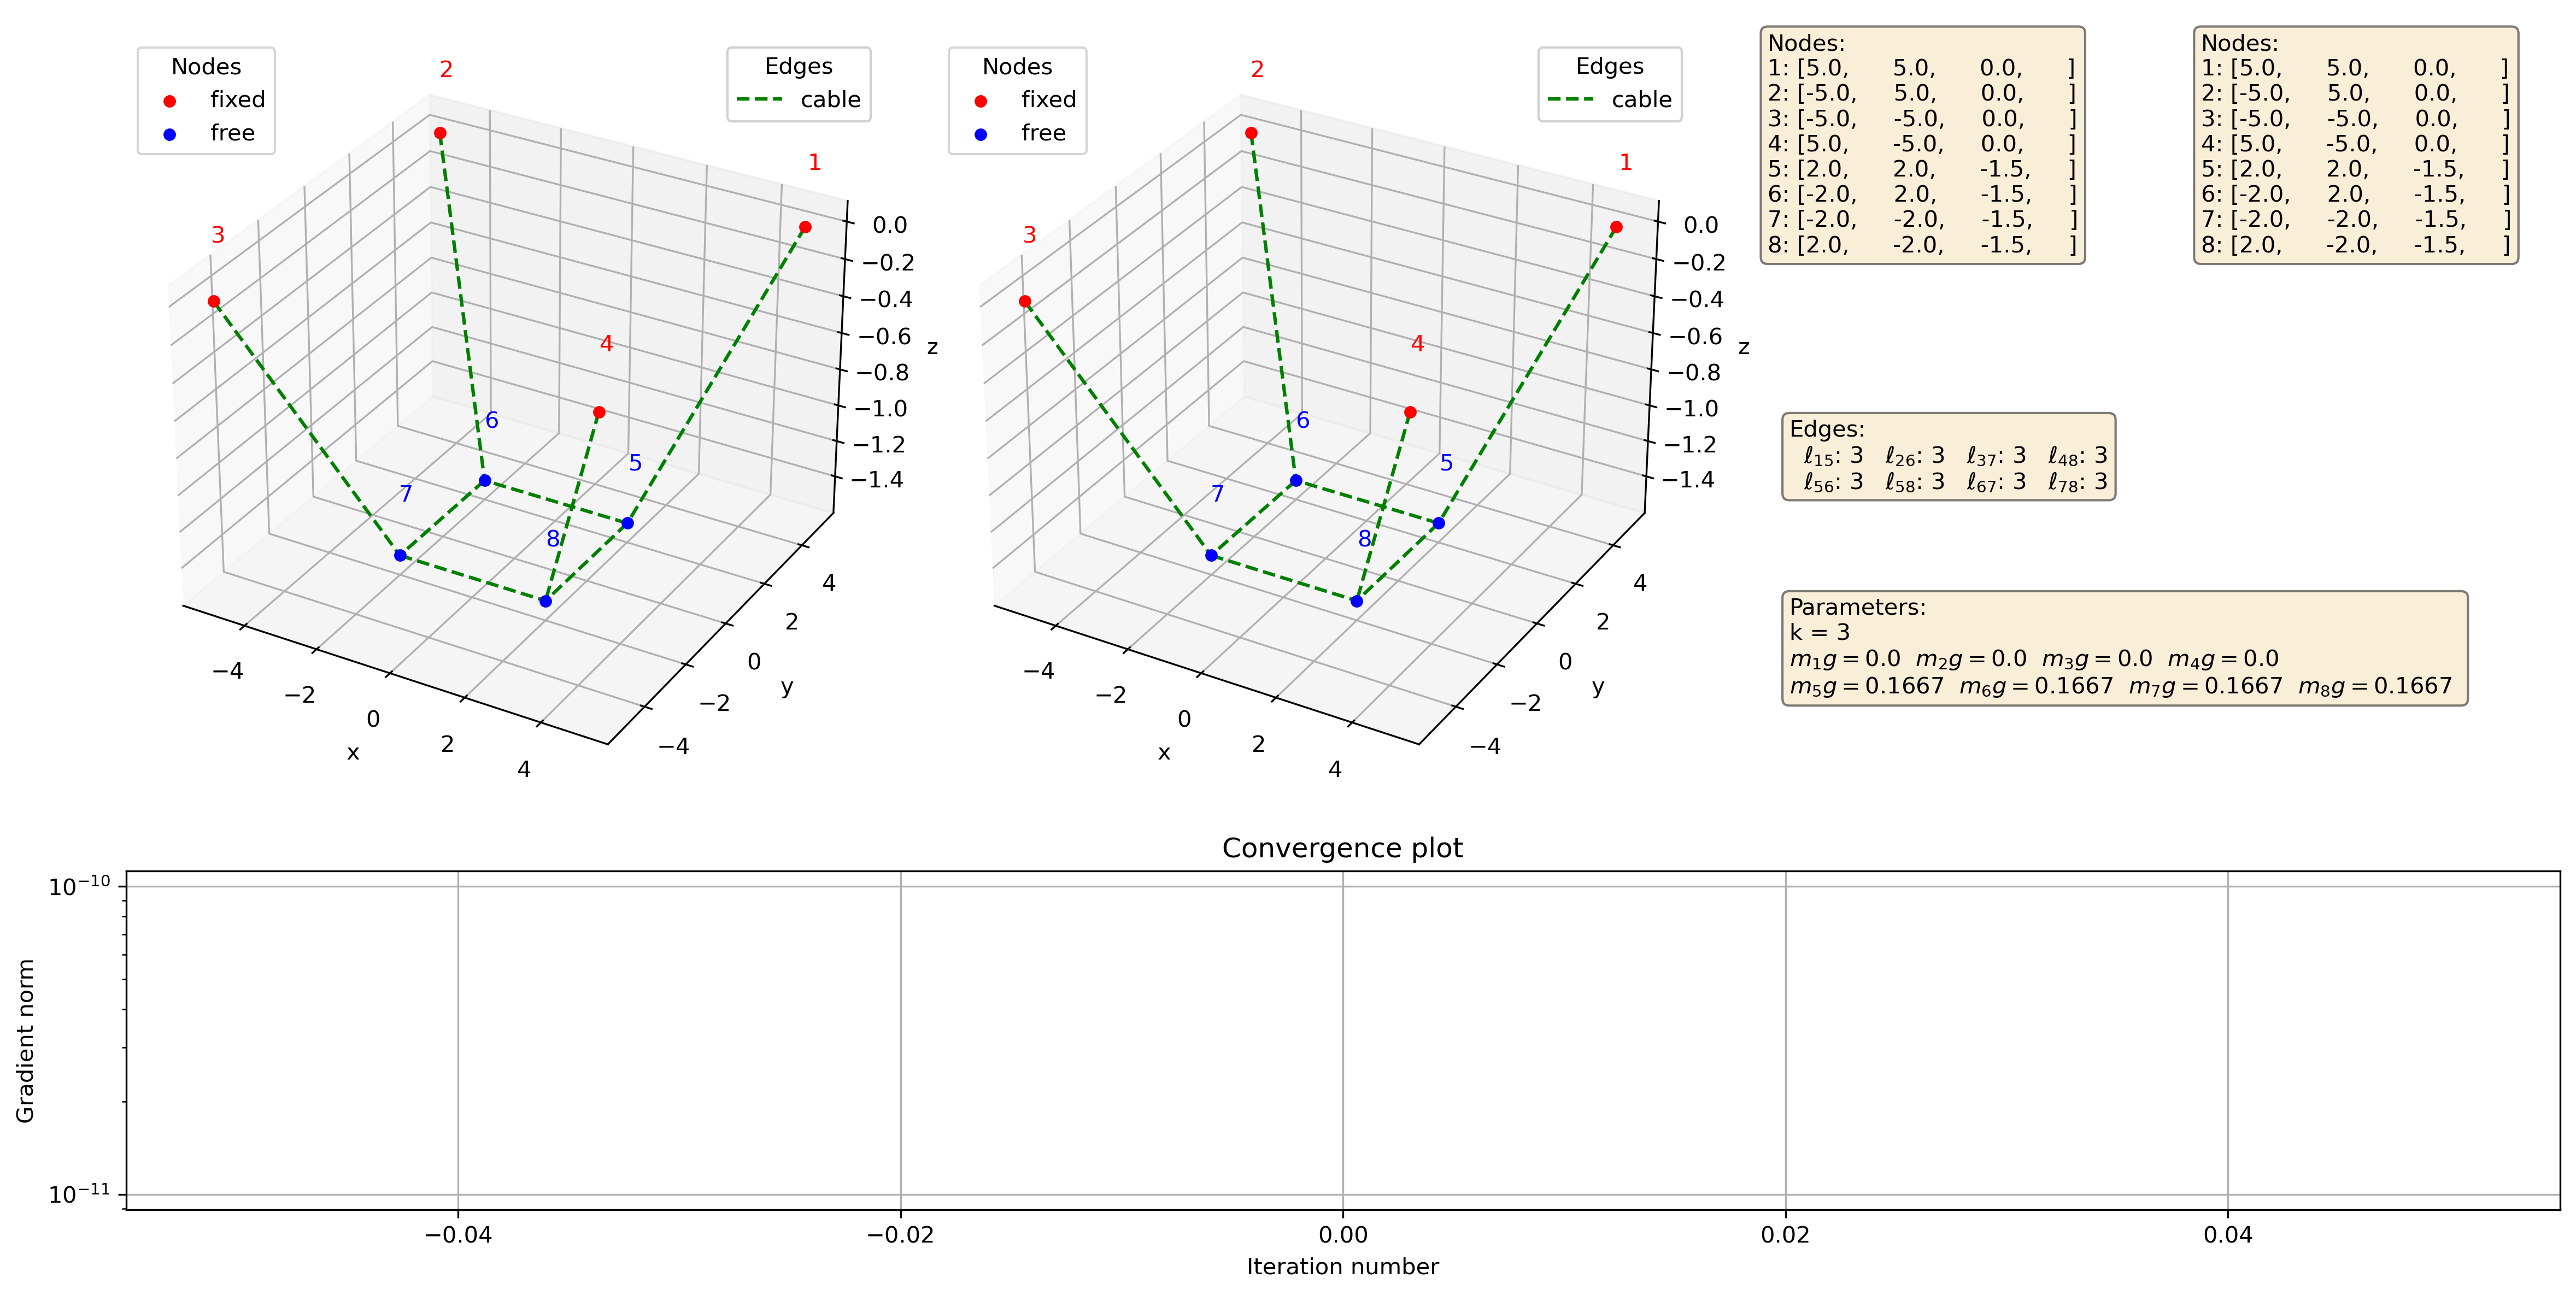

In [52]:
fig = plt.figure(figsize=(16,8))
#fig.suptitle(r"Struct 1", y=0.92)
axs = [0]*7
gs = GridSpec(4, 4, height_ratios=[3,1,2,3], width_ratios=[2,2,1,1])
axs[0] = fig.add_subplot(gs[:3,0], projection='3d') #3d plot init
axs[1] = fig.add_subplot(gs[:3,1], projection='3d') #3d plot final
axs[2] = fig.add_subplot(gs[0,2]) #nodes init
axs[3] = fig.add_subplot(gs[0,3]) #nodes final
axs[4] = fig.add_subplot(gs[1,2:]) #edges
axs[5] = fig.add_subplot(gs[2,2:]) #params
axs[6] = fig.add_subplot(gs[-1,:]) #conv plot
#plt.show()

#initialization plot
plotting.plot_structure(struct1, axs[0], show_parameters = False, show_edges= False)
plotting.nodes(struct1, axs[2])

#BFGS
norms = opt.BFGS(struct1, return_norms=True)

#converged structure
plotting.plot_structure(struct1, axs[1])
plotting.nodes(struct1, axs[3])

#convergence plot
plotting.convergence_plot(norms, axs[6])

#edges
plotting.edges(struct1, axs[4])

#paramters
plotting.parameters(struct1, axs[5])

plt.tight_layout()
plt.savefig("struct1.png")
plt.show()

BFGS used 39 iterations


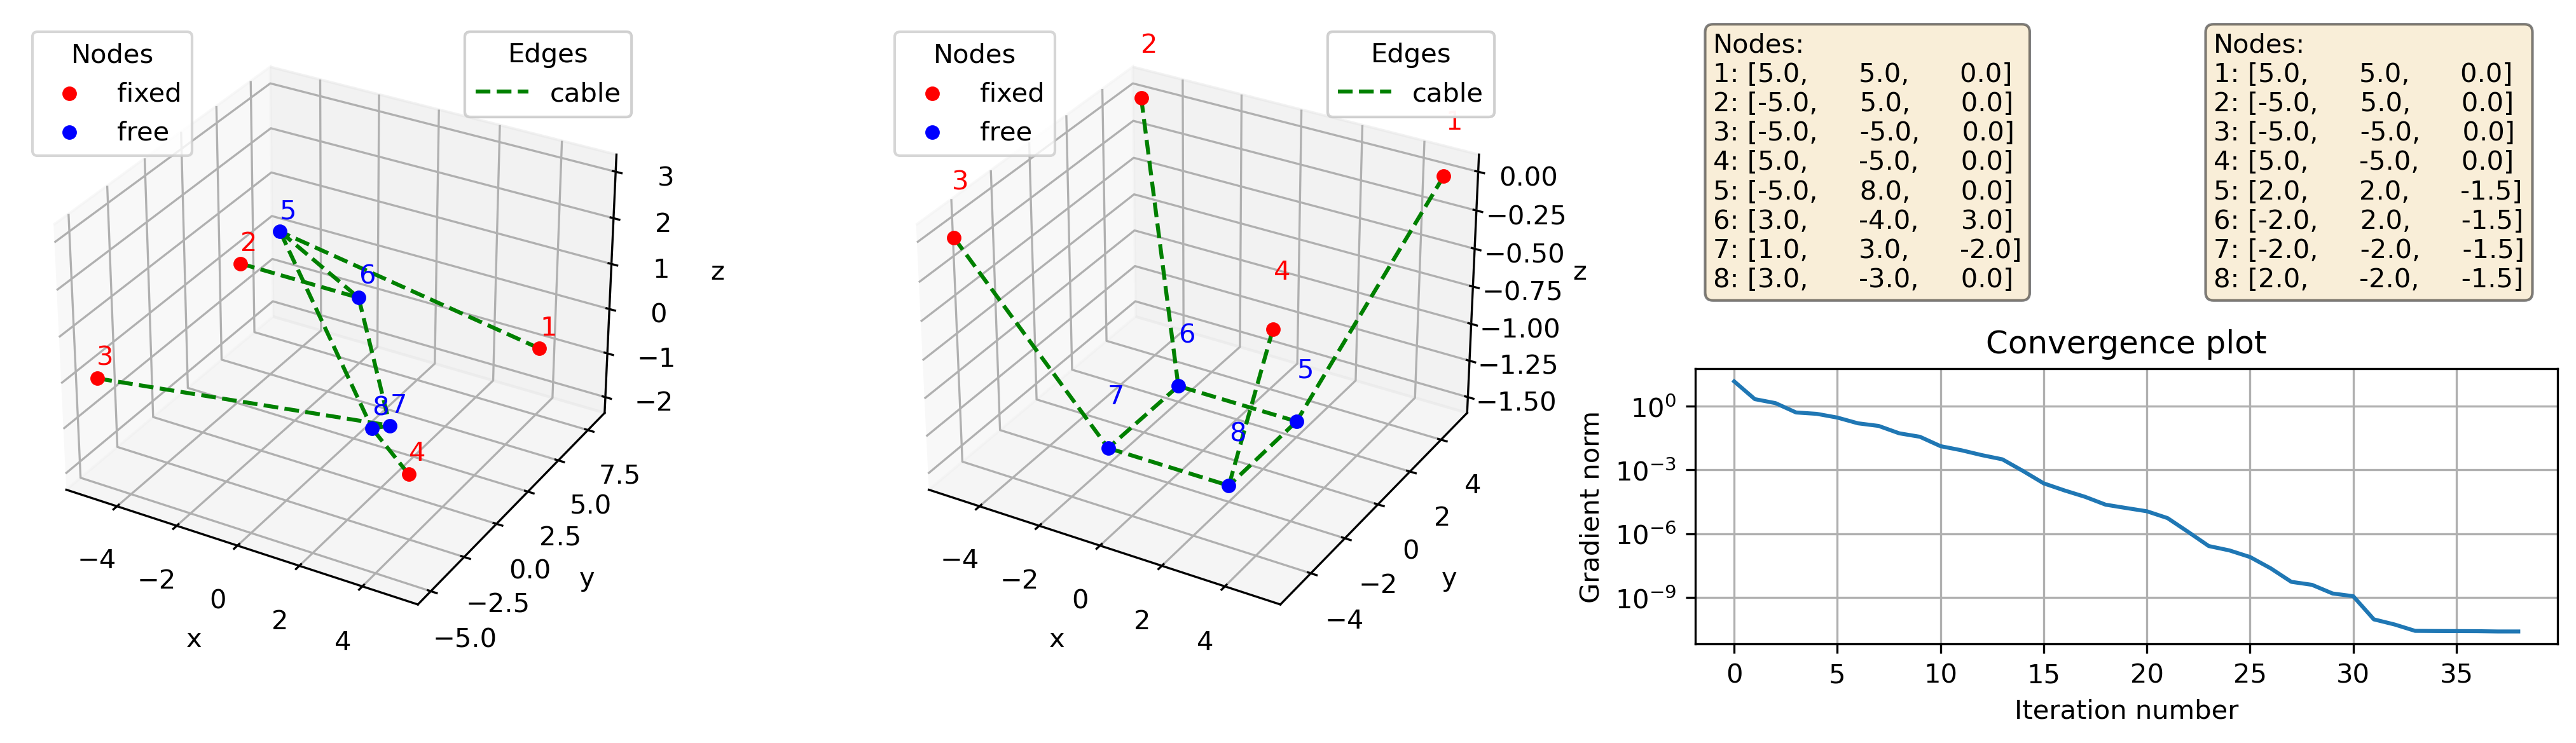

In [67]:
fig = plt.figure(figsize=(14,4))
#fig.suptitle(r"Struct 1", y=0.92)
axs = [0]*7
gs = GridSpec(2, 4, width_ratios=[2,2,1,1])
axs[0] = fig.add_subplot(gs[:2,0], projection='3d') #3d plot init
axs[1] = fig.add_subplot(gs[:2,1], projection='3d') #3d plot final
axs[2] = fig.add_subplot(gs[0,2]) #nodes init
axs[3] = fig.add_subplot(gs[0,3]) #nodes final
axs[4] = fig.add_subplot(gs[1,2:]) #convergence plot
#axs[4] = fig.add_subplot(gs[1,2:]) #edges
#axs[5] = fig.add_subplot(gs[2,2:]) #params
#axs[6] = fig.add_subplot(gs[-1,:]) #conv plot
#plt.show()


#initialization plot
plotting.plot_structure(struct1, axs[0], show_parameters = False, show_edges= False)
plotting.nodes(struct1, axs[2])

#BFGS
norms = opt.BFGS(struct1, return_norms=True)

#converged structure
plotting.plot_structure(struct1, axs[1])
plotting.nodes(struct1, axs[3])

#convergence plot
plotting.convergence_plot(norms, axs[4])

#edges
#plotting.edges(struct1, axs[4])

#paramters
#plotting.parameters(struct1, axs[5])

plt.tight_layout()
plt.savefig("struct1.png")
plt.show()

### Test example with cables and bars, fixed nodes

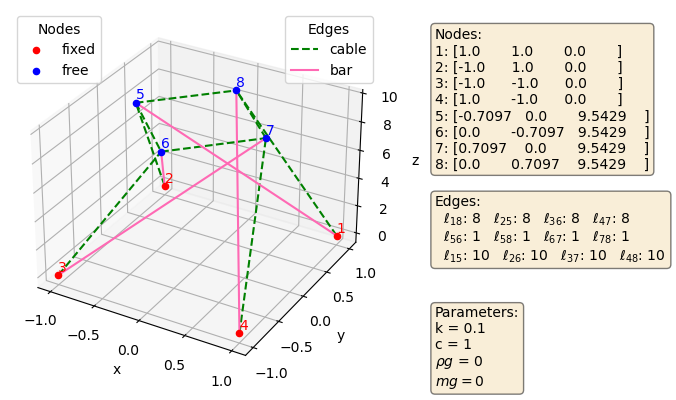

[ 2.06271080e-06  3.13847095e-09 -2.99500203e-08 -3.13847095e-09
  2.06271080e-06 -2.99500203e-08 -2.06271080e-06 -3.13847095e-09
 -2.99500203e-08  3.13847095e-09 -2.06271080e-06 -2.99500203e-08]
BFGS used 29 iterations


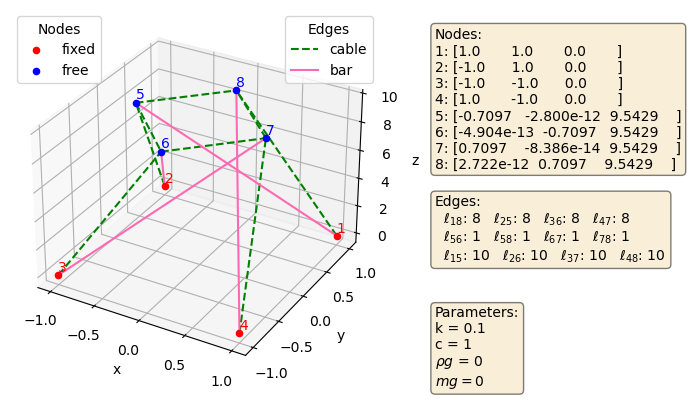

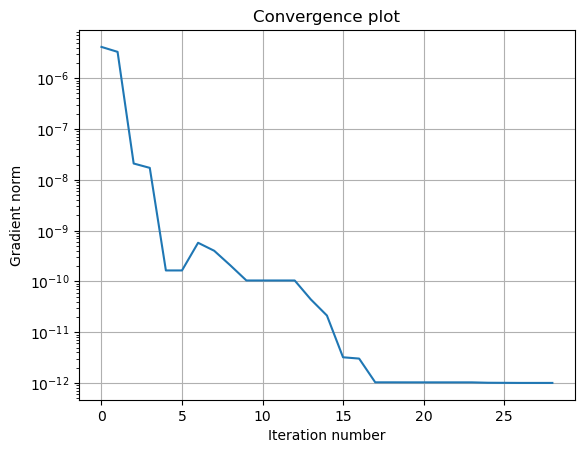

In [48]:
num_of_fixed_nodes = 4

s = 0.70970
t = 9.54287

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s,  0, t],
                  [ 0, -s, t],
                  [ s,  0, t],
                  [ 0,  s, t]])

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 0

tensstruct = TS.TensegrityStruct(num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)
plotting.plot_structure(tensstruct)
plt.show()
print(tensstruct.gradient())

norms = opt.BFGS(tensstruct, maxiter=100, return_norms=True)

plotting.plot_structure(tensstruct)
plt.show()

plotting.convergence_plot(norms)
plt.show()

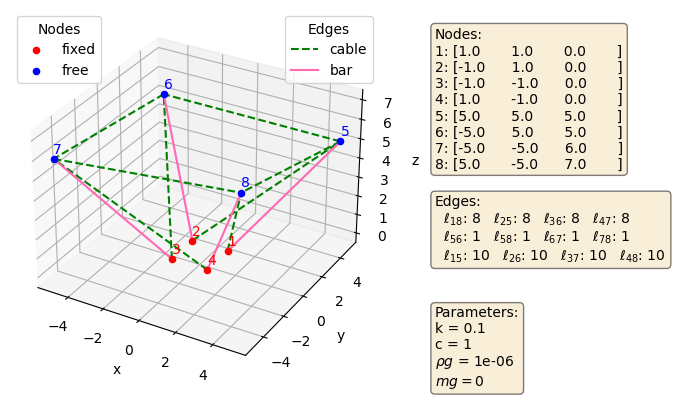

[ 0.88784666  0.88951261 -0.19592004 -0.88757068  0.88834294 -0.10558128
 -0.89336913 -0.89290914 -0.01137571  0.89732665 -0.89940971  0.26489616]
BFGS used 306 iterations


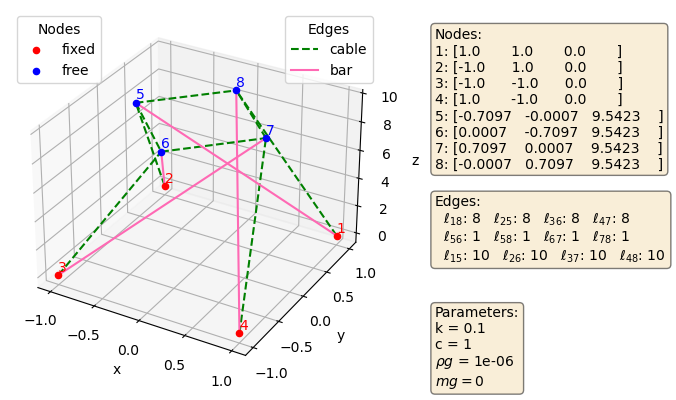

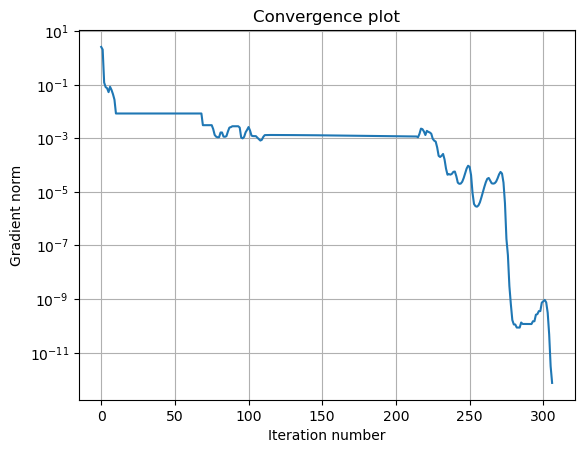

7.423627655073914e-13
[[ 1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [-7.09713802e-01 -7.13631006e-04  9.54234624e+00]
 [ 7.13631484e-04 -7.09713802e-01  9.54234624e+00]
 [ 7.09713803e-01  7.13631195e-04  9.54234624e+00]
 [-7.13630717e-04  7.09713803e-01  9.54234624e+00]]


In [49]:
s = 0.70970
t = 9.54287

num_of_fixed_nodes = 4

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1, -s-0.1, t-0.1],
                  [ s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1,  s-0.1, t-0.1]])

nodes = np.array([[ 1.0,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [5,  5, 5],
                  [-5,  5, 5],
                  [-5,  -5, 6],
                  [5,  -5, 7]])

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 1e-6

tensstruct = TS.TensegrityStruct(num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)

plotting.plot_structure(tensstruct)
plt.show()

print(tensstruct.gradient())

norms = opt.BFGS(tensstruct, maxiter=1000, return_norms=True)

plotting.plot_structure(tensstruct)
plt.show()

plotting.convergence_plot(norms)
plt.show()

print(np.linalg.norm(tensstruct.gradient()))
print(tensstruct.nodes)

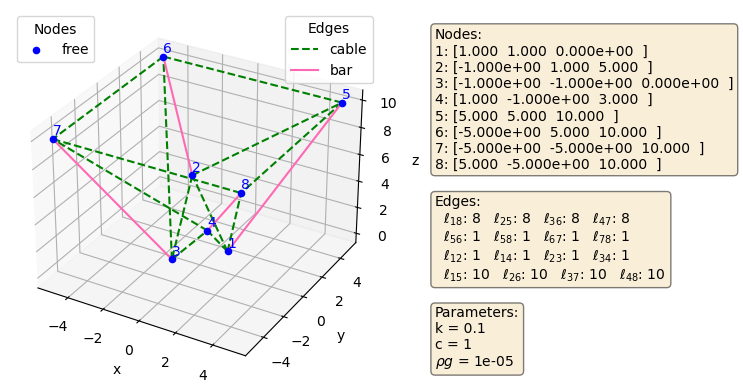

100
[-0.64234463 -0.17667018  0.17529026  0.82989132 -0.13715105 -0.16096816
 -0.64234463  0.15088665 -0.14769961  0.43918679  0.90601243  0.90573644
  0.01370114 -0.88921317  0.8903104  -0.01069046 -0.90709669 -0.90645928
  0.0152421   0.89775002 -0.89884725 -0.00224162]
BFGS used 500 iterations
BFGS used 500 iterations
BFGS used 433 iterations


In [28]:
s = 0.70970
t = 9.54287

num_of_fixed_nodes = 4

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1, -s-0.1, t-0.1],
                  [ s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1,  s-0.1, t-0.1]])

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 5],
                  [-1, -1, 0],
                  [ 1, -1, 3],
                  [ 5,  5, 10],
                  [-5,  5, 10],
                  [-5, -5, 10],
                  [ 5, -5, 10]]).astype(np.float64)

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1],
                   [0, 1, 1],
                   [0, 3, 1],
                   [1, 2, 1],
                   [2, 3, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 1e-5

new_struct2 = FSS.FreeStandingStruct(nodes, masses, cables, bars, k, c, bar_density, 100)
plotting.plot_structure(new_struct2)
plt.show()
print(new_struct2.penalty)
print(new_struct2.gradient())
tolerances=np.array([1e-7, 1e-9, 1e-11])
norms = opt.quadratic_penalty_method(new_struct2, 1000, tolerances, maxiter_BFGS=500, return_norms = True)


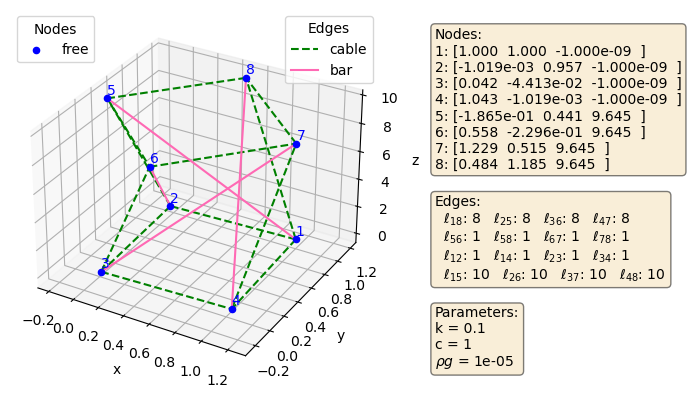

[[ 1.00000000e+00  1.00000000e+00 -1.00000002e-09]
 [-1.01913809e-03  9.56888348e-01 -1.00000000e-09]
 [ 4.20925139e-02 -4.41307901e-02 -1.00000006e-09]
 [ 1.04311165e+00 -1.01913809e-03 -9.99999935e-10]
 [-1.86457410e-01  4.40685087e-01  9.64477201e+00]
 [ 5.58295775e-01 -2.29569062e-01  9.64477201e+00]
 [ 1.22854992e+00  5.15184123e-01  9.64477201e+00]
 [ 4.83796739e-01  1.18543827e+00  9.64477201e+00]]
[ 1.00000000e-04 -1.94406313e-13 -9.47521141e-14  1.00000000e-04
  6.95013166e-14  8.78983030e-14  1.00000000e-04 -7.53442989e-14
  5.16123602e-14  1.00000000e-04 -8.71370576e-14  7.76202019e-15
 -7.88106559e-14  3.53555347e-14 -7.21063834e-14 -4.74013190e-16
  1.33115361e-13 -8.22301211e-14  1.38535017e-14 -7.18709218e-14
  1.51272712e-13  5.42361295e-15]


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Iteration number', ylabel='Gradient norm'>

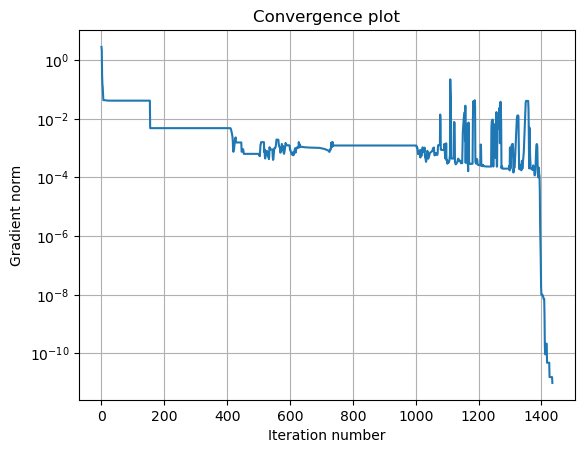

In [29]:
plotting.plot_structure(new_struct2)
plt.show()

print(new_struct2.nodes)
new_struct2.penalty=0
print(new_struct2.gradient())

plotting.convergence_plot(norms)